In [38]:
## Dual Model Sarcasm Detection and Comparative Analysis 

In [39]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.utils import resample


# --- Step 2: Load Dataset ---
df = pd.read_csv("train-balanced-sarcasm.csv", nrows=5000)
df = df[['comment', 'label']].dropna()
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]

df_majority_downsampled = resample(df_majority, 
                                   replace=False, 
                                   n_samples=len(df_minority), 
                                   random_state=42)

data = pd.concat([df_majority_downsampled, df_minority])
print(data)

                                                comment  label
1030      Since when did canon matter in fan creations?      0
839   I only have 2 hands, so I put a small tape str...      0
1656  When he was available at our pick I was so fre...      0
2256                    There might be children on here      0
1184                                  nice plot twists.      0
...                                                 ...    ...
4981                             Didn't see that coming      1
4982            Move along people, nothing to see here.      1
4986                                   Foxy is good guy      1
4988       The confederate flag is not a racist symbol!      1
4994                 You can tell because they're white      1

[1886 rows x 2 columns]


In [40]:
# --- Step 3: Clean Text Function ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['clean_comment'] = data['comment'].apply(clean_text)
X = data['clean_comment']
y = data['label']
print(data)

                                                comment  label  \
1030      Since when did canon matter in fan creations?      0   
839   I only have 2 hands, so I put a small tape str...      0   
1656  When he was available at our pick I was so fre...      0   
2256                    There might be children on here      0   
1184                                  nice plot twists.      0   
...                                                 ...    ...   
4981                             Didn't see that coming      1   
4982            Move along people, nothing to see here.      1   
4986                                   Foxy is good guy      1   
4988       The confederate flag is not a racist symbol!      1   
4994                 You can tell because they're white      1   

                                          clean_comment  
1030       since when did canon matter in fan creations  
839   i only have hands so i put a small tape strip ...  
1656  when he was available at ou

In [41]:
#TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_vec = vectorizer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [42]:
class SarcasmModelComparison:

    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    # Subclass for Confusion Matrices
    class ConfusionMatrix:
        @staticmethod
        def plot_matrix(y_true, y_pred, model_name):
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - {model_name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

    # Subclass for Scatter Plots
    class ScatterPlot:
        @staticmethod
        def plot_scatter(y_test, y_prob, model_name):
            plt.scatter(range(len(y_test)), y_prob, alpha=0.6)
            plt.title(f'{model_name} - Prediction Probability Scatter')
            plt.xlabel('Samples')
            plt.ylabel('Predicted Probability')
            plt.show()

    #Main comparison method (missing earlier)
    def compare_models(self):
        # Logistic Regression
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(self.X_train, self.y_train)
        y_pred_lr = log_reg.predict(self.X_test)
        y_prob_lr = log_reg.predict_proba(self.X_test)[:, 1]

        # SVM
        svm_model = SVC(probability=True)
        svm_model.fit(self.X_train, self.y_train)
        y_pred_svm = svm_model.predict(self.X_test)
        y_prob_svm = svm_model.predict_proba(self.X_test)[:, 1]

        # Show results
        print("🔹 Logistic Regression Report:\n", classification_report(self.y_test, y_pred_lr))
        print("Accuracy:", accuracy_score(self.y_test, y_pred_lr))

        print("\n🔹 SVM Report:\n", classification_report(self.y_test, y_pred_svm))
        print("Accuracy:", accuracy_score(self.y_test, y_pred_svm))

        # Plot Confusion Matrices
        self.ConfusionMatrix.plot_matrix(self.y_test, y_pred_lr, "Logistic Regression")
        self.ConfusionMatrix.plot_matrix(self.y_test, y_pred_svm, "SVM")

        # Plot Scatter Plots
        self.ScatterPlot.plot_scatter(self.y_test, y_prob_lr, "Logistic Regression")
        self.ScatterPlot.plot_scatter(self.y_test, y_prob_svm, "SVM")

        
        # Metrics
        acc_lr = accuracy_score(self.y_test, y_pred_lr)
        acc_svm = accuracy_score(self.y_test, y_pred_svm)

        f1_lr = f1_score(self.y_test, y_pred_lr)
        f1_svm = f1_score(self.y_test, y_pred_svm)

        precision_lr = precision_score(self.y_test, y_pred_lr)
        precision_svm = precision_score(self.y_test, y_pred_svm)

        recall_lr = recall_score(self.y_test, y_pred_lr)
        recall_svm = recall_score(self.y_test, y_pred_svm)

        # Print Comparison
        print("\n Overall Comparison ")
        print(f"Accuracy (Logistic Regression): {acc_lr:.4f}")
        print(f"Accuracy (SVM): {acc_svm:.4f}")
        print(f"F1 Score (Logistic Regression): {f1_lr:.4f}")
        print(f"F1 Score (SVM): {f1_svm:.4f}")
        print(f"Precision (Logistic Regression): {precision_lr:.4f}")
        print(f"Precision (SVM): {precision_svm:.4f}")
        print(f"Recall (Logistic Regression): {recall_lr:.4f}")
        print(f"Recall (SVM): {recall_svm:.4f}")
     
        # Determine Best Model
        if acc_lr > acc_svm and f1_lr > f1_svm:
            better_model = "Logistic Regression"
        elif acc_svm > acc_lr and f1_svm > f1_lr:
            better_model = "SVM"
        else:
            better_model = "Both models perform similarly"

        print("\n The better model overall is:", better_model)

🔹 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.57      0.66      0.61       191
           1       0.58      0.48      0.53       187

    accuracy                           0.57       378
   macro avg       0.57      0.57      0.57       378
weighted avg       0.57      0.57      0.57       378

Accuracy: 0.5714285714285714

🔹 SVM Report:
               precision    recall  f1-score   support

           0       0.55      0.61      0.58       191
           1       0.55      0.49      0.52       187

    accuracy                           0.55       378
   macro avg       0.55      0.55      0.55       378
weighted avg       0.55      0.55      0.55       378

Accuracy: 0.5529100529100529


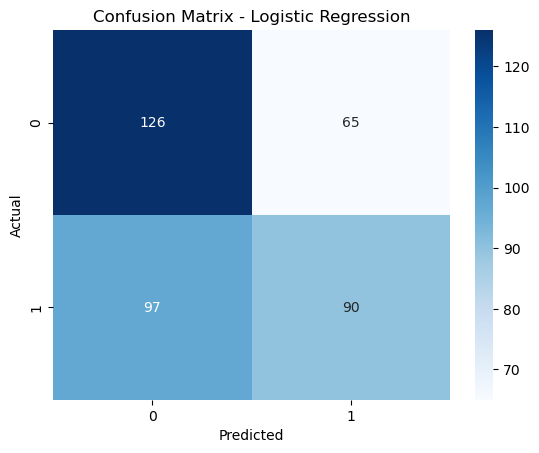

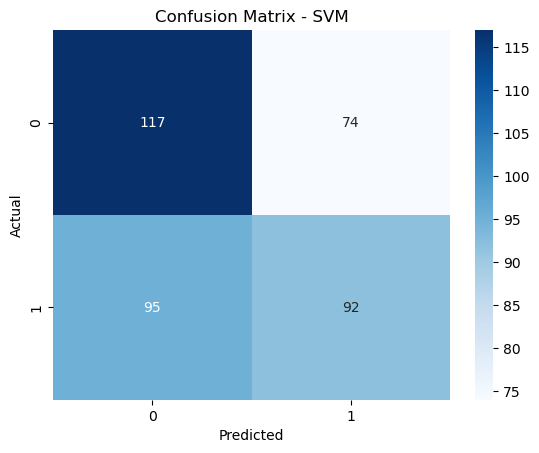

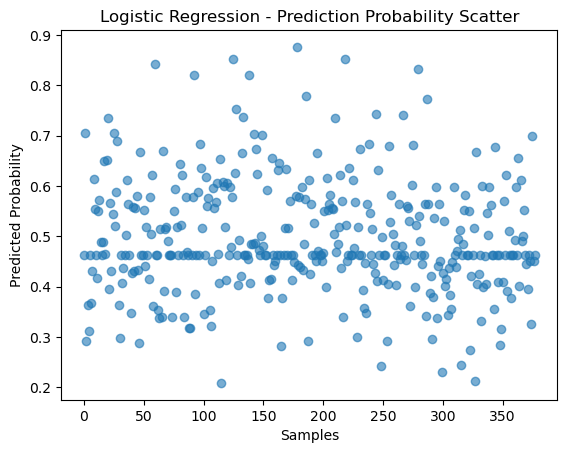

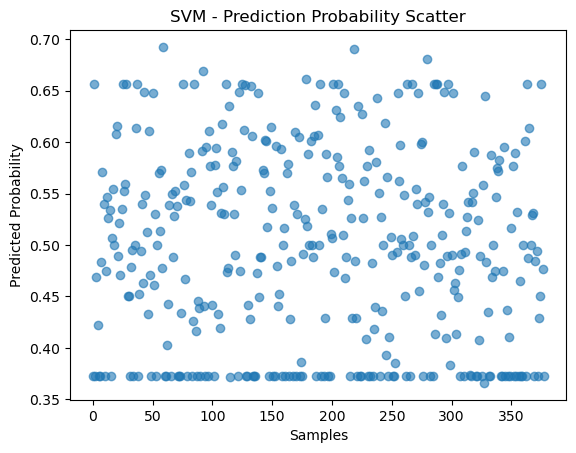


 Overall Comparison 
Accuracy (Logistic Regression): 0.5714
Accuracy (SVM): 0.5529
F1 Score (Logistic Regression): 0.5263
F1 Score (SVM): 0.5212
Precision (Logistic Regression): 0.5806
Precision (SVM): 0.5542
Recall (Logistic Regression): 0.4813
Recall (SVM): 0.4920

 The better model overall is: Logistic Regression


In [43]:
project = SarcasmModelComparison(X_train, X_test, y_train, y_test)
project.compare_models()